In [144]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt
%matplotlib inline
import shap, scipy

shap.initjs()

In [2]:
df = pd.read_excel('data/WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
for column in df.columns:
    print('Column: {}, Unique Features: {}'.format(column,df[column].nunique()))

Column: Age, Unique Features: 43
Column: Attrition, Unique Features: 2
Column: BusinessTravel, Unique Features: 3
Column: DailyRate, Unique Features: 886
Column: Department, Unique Features: 3
Column: DistanceFromHome, Unique Features: 29
Column: Education, Unique Features: 5
Column: EducationField, Unique Features: 6
Column: EmployeeCount, Unique Features: 1
Column: EmployeeNumber, Unique Features: 1470
Column: EnvironmentSatisfaction, Unique Features: 4
Column: Gender, Unique Features: 2
Column: HourlyRate, Unique Features: 71
Column: JobInvolvement, Unique Features: 4
Column: JobLevel, Unique Features: 5
Column: JobRole, Unique Features: 9
Column: JobSatisfaction, Unique Features: 4
Column: MaritalStatus, Unique Features: 3
Column: MonthlyIncome, Unique Features: 1349
Column: MonthlyRate, Unique Features: 1427
Column: NumCompaniesWorked, Unique Features: 10
Column: Over18, Unique Features: 1
Column: OverTime, Unique Features: 2
Column: PercentSalaryHike, Unique Features: 15
Column: 

In [6]:
df.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [7]:
cat_cols = df.select_dtypes('object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.astype('category').cat.codes)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df_interp = pd.read_excel('data/WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [9]:
X,y = df.drop('Attrition',axis=1),df['Attrition']

In [27]:
import seaborn as sns

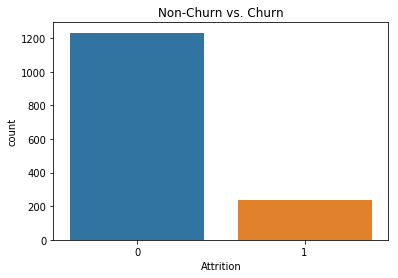

In [29]:
sns.countplot(y)
plt.title("Non-Churn vs. Churn")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=30,max_features='sqrt',min_samples_leaf=3)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8621399176954733

In [39]:
import src.model_evaluation_utils as meu

In [41]:
meu.display_model_performance_metrics(rf.predict(X_test),y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.8621
Precision: 0.976
Recall: 0.8621
F1 Score: 0.9107

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.09      0.67      0.15         9
          0       0.99      0.87      0.92       477

avg / total       0.98      0.86      0.91       486


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1          6    3
        0         64  413


In [53]:
importance_df = pd.DataFrame({'Columns':X.columns,
                              'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)

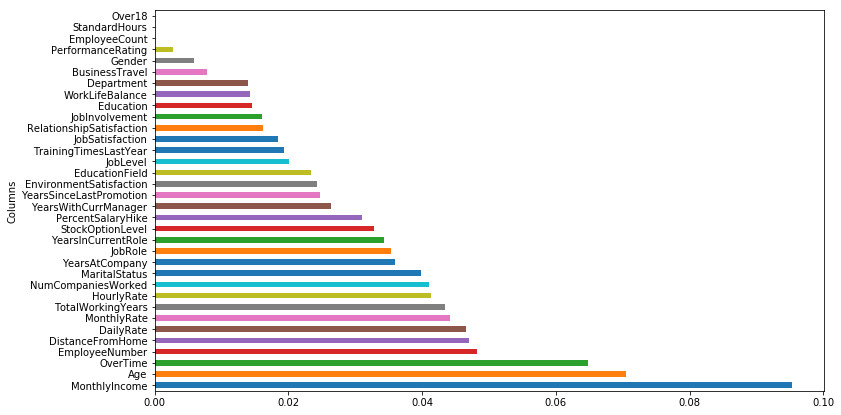

In [57]:
importance_df.plot('Columns', 'Importance', 'barh', figsize=(12,7), legend=False)

In [68]:
keep_cols = importance_df[importance_df.Importance > 0.01]['Columns'].values
df_keep = df[keep_cols]
X_interp = df_interp[keep_cols]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_keep, y, test_size=0.33, random_state=42)

In [74]:
rf = RandomForestClassifier(n_estimators=30,max_features='sqrt',min_samples_leaf=3)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8683127572016461

In [75]:
meu.display_model_performance_metrics(rf.predict(X_test),y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.8683
Precision: 0.9714
Recall: 0.8683
F1 Score: 0.9106

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.13      0.75      0.22        12
          0       0.99      0.87      0.93       474

avg / total       0.97      0.87      0.91       486


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1          9    3
        0         61  413


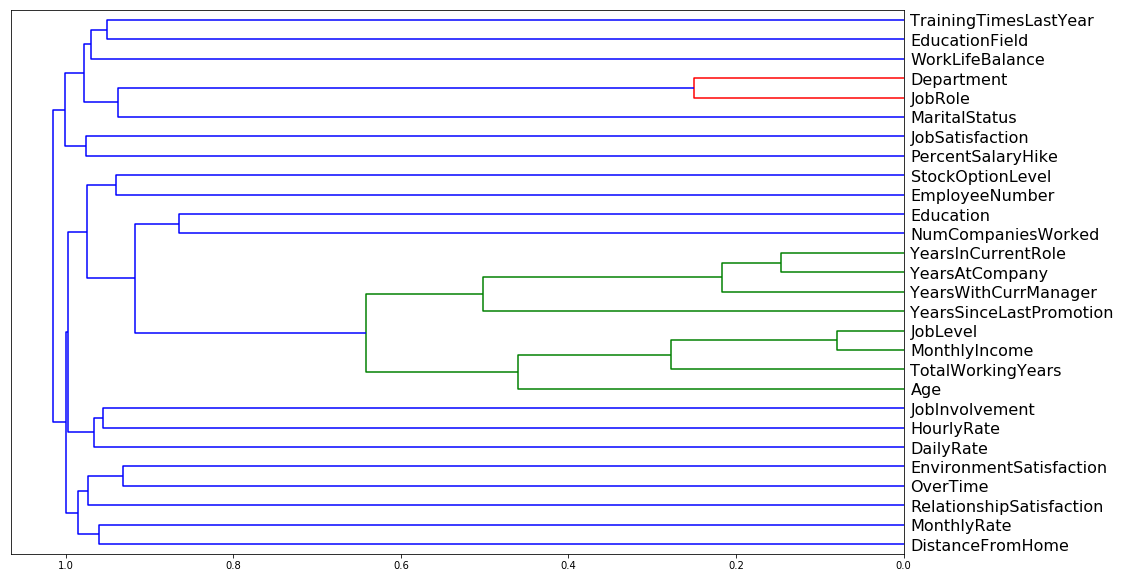

In [145]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [76]:
import shap

In [77]:
explainer = shap.TreeExplainer(rf,X_train)
shap_values = explainer.shap_values(X_train)

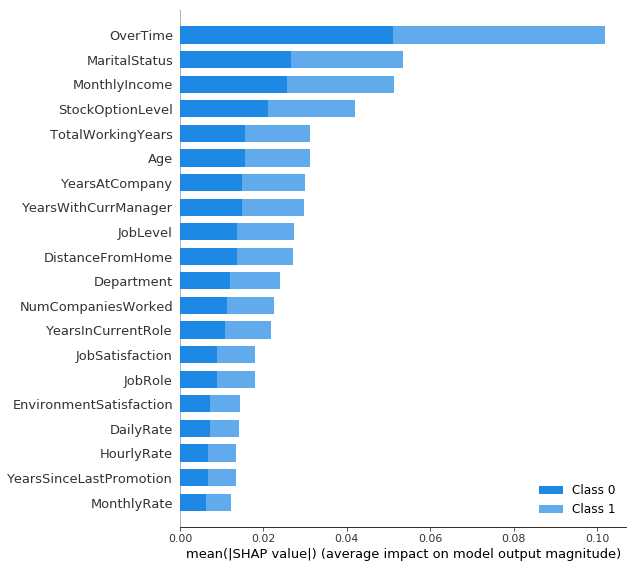

In [82]:
shap.summary_plot(shap_values, X_train)

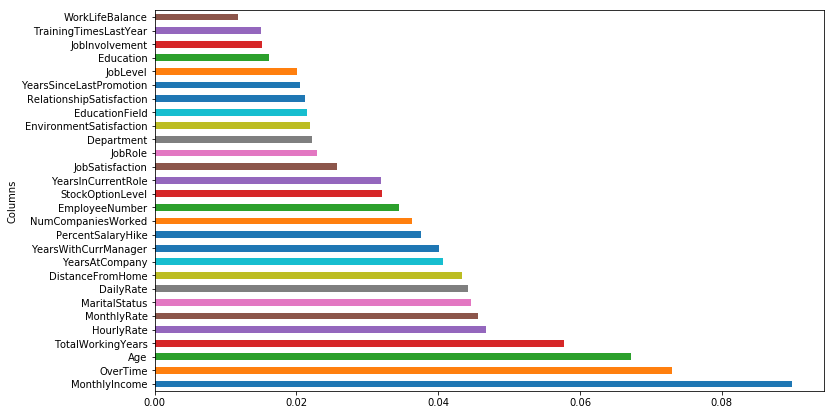

In [84]:
importance_df = pd.DataFrame({'Columns':df_keep.columns,
                              'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)
importance_df.plot('Columns', 'Importance', 'barh', figsize=(12,7), legend=False)

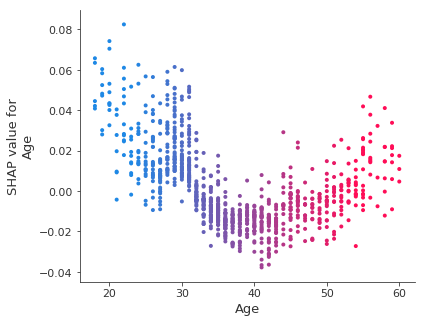

In [92]:
shap.dependence_plot(ind="Age", interaction_index="Age",
                     shap_values=shap_values[1], 
                     features=X_train)

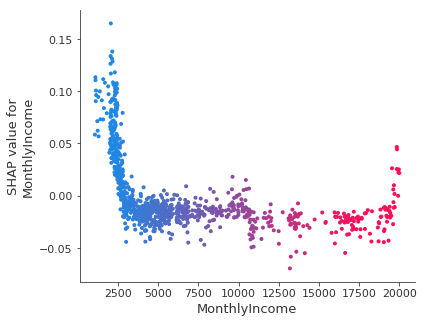

In [93]:
shap.dependence_plot(ind="MonthlyIncome", interaction_index="MonthlyIncome",
                     shap_values=shap_values[1], 
                     features=X_train)

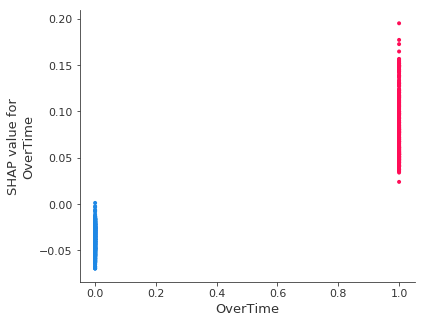

In [95]:
shap.dependence_plot(ind="OverTime", interaction_index="OverTime",
                     shap_values=shap_values[1], 
                     features=X_train)

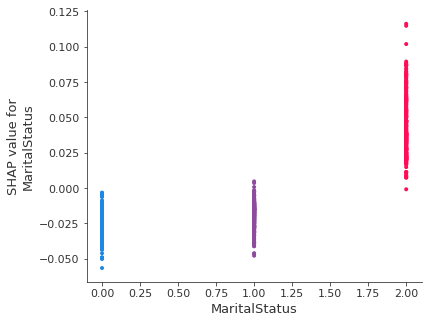

In [110]:
shap.dependence_plot(ind="MaritalStatus", interaction_index="MaritalStatus",
                     shap_values=shap_values[1], 
                     features=X_train)

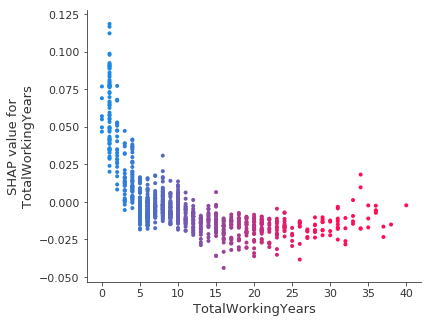

In [118]:
shap.dependence_plot(ind="TotalWorkingYears", interaction_index="TotalWorkingYears",
                     shap_values=shap_values[1], 
                     features=X_train)

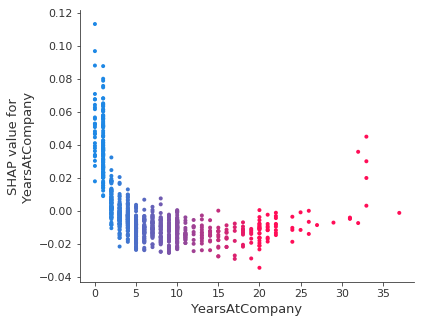

In [119]:
shap.dependence_plot(ind="YearsAtCompany", interaction_index="YearsAtCompany",
                     shap_values=shap_values[1], 
                     features=X_train)

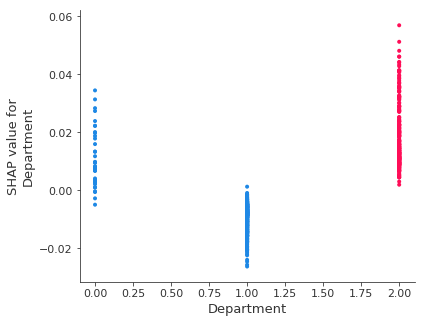

In [138]:
shap.dependence_plot(ind="Department", interaction_index="Department",
                     shap_values=shap_values[1], 
                     features=X_train)

In [152]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][:500], X_train.iloc[:500,:])

In [154]:
shap.force_plot(explainer.expected_value[1], shap_values[1][330], X_train.iloc[330,:])

In [117]:
X_train.columns

Index(['MonthlyIncome', 'Age', 'OverTime', 'EmployeeNumber',
       'DistanceFromHome', 'DailyRate', 'MonthlyRate', 'TotalWorkingYears',
       'HourlyRate', 'NumCompaniesWorked', 'MaritalStatus', 'YearsAtCompany',
       'JobRole', 'YearsInCurrentRole', 'StockOptionLevel',
       'PercentSalaryHike', 'YearsWithCurrManager', 'YearsSinceLastPromotion',
       'EnvironmentSatisfaction', 'EducationField', 'JobLevel',
       'TrainingTimesLastYear', 'JobSatisfaction', 'RelationshipSatisfaction',
       'JobInvolvement', 'Education', 'WorkLifeBalance', 'Department'],
      dtype='object')

In [133]:
pd.set_option('display.max_columns', 500)
display(df_keep.head())
display(X_interp.head())

,MonthlyIncome,Age,OverTime,EmployeeNumber,DistanceFromHome,DailyRate,MonthlyRate,TotalWorkingYears,HourlyRate,NumCompaniesWorked,MaritalStatus,YearsAtCompany,JobRole,YearsInCurrentRole,StockOptionLevel,PercentSalaryHike,YearsWithCurrManager,YearsSinceLastPromotion,EnvironmentSatisfaction,EducationField,JobLevel,TrainingTimesLastYear,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,Education,WorkLifeBalance,Department
0,5993,41,1,1,1,1102,19479,8,94,8,2,6,7,4,0,11,5,0,2,1,2,0,4,1,3,2,1,2
1,5130,49,0,2,8,279,24907,10,61,1,1,10,6,7,1,23,7,1,3,1,2,3,2,4,2,1,3,1
2,2090,37,1,4,2,1373,2396,7,92,6,2,0,2,0,0,15,0,0,4,4,1,3,3,2,2,2,3,1
3,2909,33,1,5,3,1392,23159,8,56,1,1,8,6,7,0,11,0,3,4,1,1,3,3,3,3,4,3,1
4,3468,27,0,7,2,591,16632,6,40,9,1,2,2,2,1,12,2,2,1,3,1,3,2,4,3,1,3,1


,MonthlyIncome,Age,OverTime,EmployeeNumber,DistanceFromHome,DailyRate,MonthlyRate,TotalWorkingYears,HourlyRate,NumCompaniesWorked,MaritalStatus,YearsAtCompany,JobRole,YearsInCurrentRole,StockOptionLevel,PercentSalaryHike,YearsWithCurrManager,YearsSinceLastPromotion,EnvironmentSatisfaction,EducationField,JobLevel,TrainingTimesLastYear,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,Education,WorkLifeBalance,Department
0,5993,41,Yes,1,1,1102,19479,8,94,8,Single,6,Sales Executive,4,0,11,5,0,2,Life Sciences,2,0,4,1,3,2,1,Sales
1,5130,49,No,2,8,279,24907,10,61,1,Married,10,Research Scientist,7,1,23,7,1,3,Life Sciences,2,3,2,4,2,1,3,Research & Development
2,2090,37,Yes,4,2,1373,2396,7,92,6,Single,0,Laboratory Technician,0,0,15,0,0,4,Other,1,3,3,2,2,2,3,Research & Development
3,2909,33,Yes,5,3,1392,23159,8,56,1,Married,8,Research Scientist,7,0,11,0,3,4,Life Sciences,1,3,3,3,3,4,3,Research & Development
4,3468,27,No,7,2,591,16632,6,40,9,Married,2,Laboratory Technician,2,1,12,2,2,1,Medical,1,3,2,4,3,1,3,Research & Development


In [157]:
df_keep[df_keep['JobRole']==8].head()

,MonthlyIncome,Age,OverTime,EmployeeNumber,DistanceFromHome,DailyRate,MonthlyRate,TotalWorkingYears,HourlyRate,NumCompaniesWorked,MaritalStatus,YearsAtCompany,JobRole,YearsInCurrentRole,StockOptionLevel,PercentSalaryHike,YearsWithCurrManager,YearsSinceLastPromotion,EnvironmentSatisfaction,EducationField,JobLevel,TrainingTimesLastYear,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,Education,WorkLifeBalance,Department
21,3407,36,0,27,9,1218,6986,10,82,7,2,5,8,3,0,23,3,0,3,1,1,4,1,2,2,4,3,2
33,2086,39,0,42,5,895,3335,19,56,3,1,1,8,0,1,14,0,0,4,5,2,6,4,3,3,3,4,2
36,2683,50,1,47,3,869,3810,3,86,1,1,3,8,2,0,14,2,0,1,2,1,2,3,3,2,2,3,2
37,2014,35,0,49,2,890,9687,2,97,1,1,2,8,2,0,13,2,2,4,2,1,3,4,1,3,3,3,2
86,2322,23,0,113,2,541,9518,3,62,3,0,0,8,0,1,13,0,0,3,5,1,3,1,3,3,1,3,2


In [160]:
X_interp[X_interp['EmployeeNumber']==27]

,MonthlyIncome,Age,OverTime,EmployeeNumber,DistanceFromHome,DailyRate,MonthlyRate,TotalWorkingYears,HourlyRate,NumCompaniesWorked,MaritalStatus,YearsAtCompany,JobRole,YearsInCurrentRole,StockOptionLevel,PercentSalaryHike,YearsWithCurrManager,YearsSinceLastPromotion,EnvironmentSatisfaction,EducationField,JobLevel,TrainingTimesLastYear,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,Education,WorkLifeBalance,Department
21,3407,36,No,27,9,1218,6986,10,82,7,Single,5,Sales Representative,3,0,23,3,0,3,Life Sciences,1,4,1,2,2,4,3,Sales


In [170]:
X_interp.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [183]:
df_keep[df_keep['JobRole']==0]['EmployeeNumber'].head(1).values[0]

13

In [187]:
X_interp[X_interp['EmployeeNumber']==13]['JobRole'].head(1).values[0]

'Healthcare Representative'

In [194]:
roles = {}

for i in range(9):
    employee_num= df_keep[df_keep['JobRole']==i]['EmployeeNumber'].head(1).values[0]
    role = X_interp[X_interp['EmployeeNumber']==employee_num]['JobRole'].head(1).values[0]
    roles[i] = role
    
roles

{0: 'Healthcare Representative',
 1: 'Human Resources',
 2: 'Laboratory Technician',
 3: 'Manager',
 4: 'Manufacturing Director',
 5: 'Research Director',
 6: 'Research Scientist',
 7: 'Sales Executive',
 8: 'Sales Representative'}

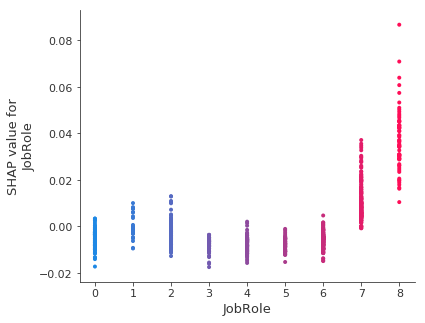

In [197]:
shap.dependence_plot(ind="JobRole", interaction_index="JobRole",
                     shap_values=shap_values[1], 
                     features=X_train)

In [208]:
OT_df = df[['Age','Attrition','MaritalStatus','MonthlyIncome','OverTime','WorkLifeBalance','JobRole']]
OT_df

,Age,Attrition,MaritalStatus,MonthlyIncome,OverTime,WorkLifeBalance,JobRole
0,41,1,2,5993,1,1,7
1,49,0,1,5130,0,3,6
2,37,1,2,2090,1,3,2
3,33,0,1,2909,1,3,6
4,27,0,1,3468,0,3,2
5,32,0,2,3068,0,2,2
6,59,0,1,2670,1,2,2
7,30,0,0,2693,0,3,2
8,38,0,2,9526,0,3,4
9,36,0,1,5237,0,2,0


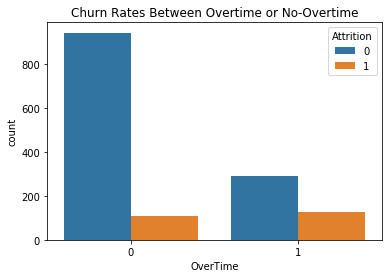

In [219]:
sns.countplot(OT_df['OverTime'],hue=OT_df['Attrition'])
plt.title('Churn Rates Between Overtime or No-Overtime')
plt.show()

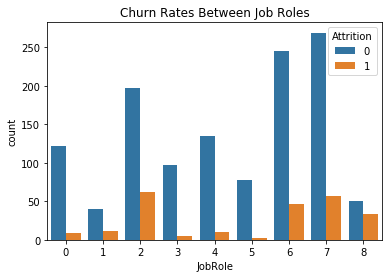

In [221]:
sns.countplot(OT_df['JobRole'],hue=OT_df['Attrition'])
plt.title('Churn Rates Between Job Roles')
plt.show()

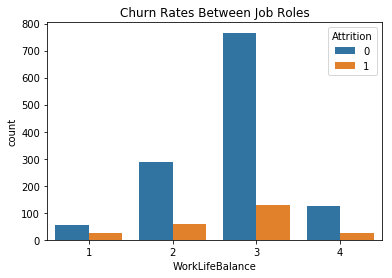

In [222]:
sns.countplot(OT_df['WorkLifeBalance'],hue=OT_df['Attrition'])
plt.title('Churn Rates For Work Life Balance')
plt.show()

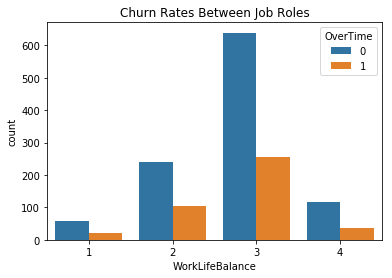

In [223]:
sns.countplot(OT_df['WorkLifeBalance'],hue=OT_df['OverTime'])
plt.title('Churn Rates Between Job Roles')
plt.show()

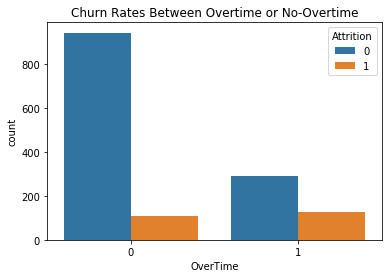

In [255]:
sns.countplot(OT_df['OverTime'],hue=OT_df['Attrition'])
plt.title('Churn Rates Between Overtime or No-Overtime')
plt.show()

In [256]:
sum(OT_df[OT_df['OverTime'] == 1]['Attrition'])/len(OT_df[OT_df['OverTime'] == 1]['Attrition'])

0.30528846153846156

In [257]:
sum(OT_df[OT_df['OverTime'] == 0]['Attrition'])/len(OT_df[OT_df['OverTime'] == 0]['Attrition'])

0.10436432637571158

In [258]:
young_single = OT_df[(OT_df['Age'] < 30)&(OT_df['MaritalStatus'] == 2)]
young_single

,Age,Attrition,MaritalStatus,MonthlyIncome,OverTime,WorkLifeBalance,JobRole
11,29,0,2,4193,1,3,2
14,28,1,2,2028,1,3,2
23,21,0,2,1232,0,3,6
42,26,1,2,2293,0,2,2
43,27,0,2,8726,0,3,7
51,28,1,2,3441,1,2,2
102,20,1,2,2926,1,3,2
107,25,1,2,5744,1,3,7
109,22,0,2,2871,0,3,2
127,19,1,2,1675,1,2,8


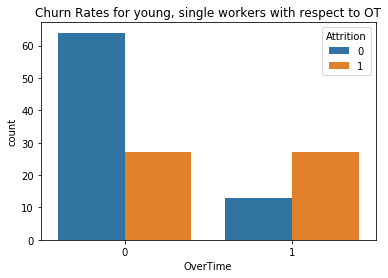

In [259]:
sns.countplot(young_single['OverTime'],hue=young_single['Attrition'])
plt.title('Churn Rates for young, single workers with respect to OT')
plt.show()

In [265]:
sum(young_single[young_single['OverTime'] == 1]['Attrition'])/\
len(young_single[young_single['OverTime'] == 1]['Attrition'])

0.675

In [266]:
sum(young_single[young_single['OverTime'] == 0]['Attrition'])/\
len(young_single[young_single['OverTime'] == 0]['Attrition'])

0.2967032967032967

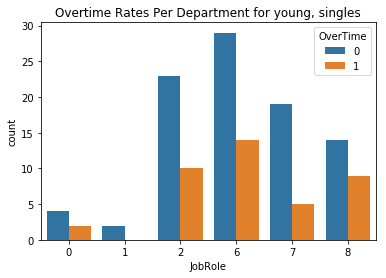

In [260]:
sns.countplot(young_single['JobRole'],hue=young_single['OverTime'])
plt.title('Overtime Rates Per Department for young, singles')
plt.show()

In [261]:
young_single_underpaid = OT_df[(OT_df['Age'] < 30)&(OT_df['MaritalStatus'] == 2)&(OT_df['MonthlyIncome'] < 2500)]
young_single_underpaid

,Age,Attrition,MaritalStatus,MonthlyIncome,OverTime,WorkLifeBalance,JobRole
14,28,1,2,2028,1,3,2
23,21,0,2,1232,0,3,6
42,26,1,2,2293,0,2,2
127,19,1,2,1675,1,2,8
149,19,0,2,1483,0,3,2
171,19,1,2,2325,0,4,8
177,19,1,2,1102,0,2,2
191,27,0,2,2279,0,2,6
217,29,1,2,2058,0,2,6
229,29,1,2,2389,1,2,6


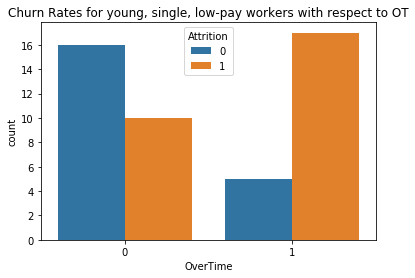

In [267]:
sns.countplot(young_single_underpaid['OverTime'],hue=young_single_underpaid['Attrition'])
plt.title('Churn Rates for young, single, low-pay workers with respect to OT')
plt.show()

In [269]:
sum(young_single_underpaid[young_single_underpaid['OverTime'] == 0]['Attrition'])/\
len(young_single_underpaid[young_single_underpaid['OverTime'] == 0]['Attrition'])

0.38461538461538464

In [268]:
sum(young_single_underpaid[young_single_underpaid['OverTime'] == 1]['Attrition'])/\
len(young_single_underpaid[young_single_underpaid['OverTime'] == 1]['Attrition'])

0.7727272727272727

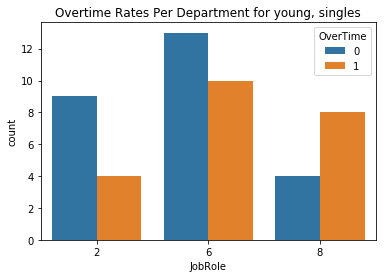

In [263]:
sns.countplot(young_single_underpaid['JobRole'],hue=young_single_underpaid['OverTime'])
plt.title('Overtime Rates Per Department for young, singles')
plt.show()

In [271]:
others = OT_df[(OT_df['Age'] >= 30)&(OT_df['MaritalStatus'] != 2)]

In [272]:
others

,Age,Attrition,MaritalStatus,MonthlyIncome,OverTime,WorkLifeBalance,JobRole
1,49,0,1,5130,0,3,6
3,33,0,1,2909,1,3,6
6,59,0,1,2670,1,2,2
7,30,0,0,2693,0,3,2
9,36,0,1,5237,0,2,0
10,35,0,1,2426,0,3,2
12,31,0,0,2911,0,2,6
13,34,0,0,2661,0,3,2
16,32,0,0,3298,1,2,6
18,53,0,1,15427,0,3,3


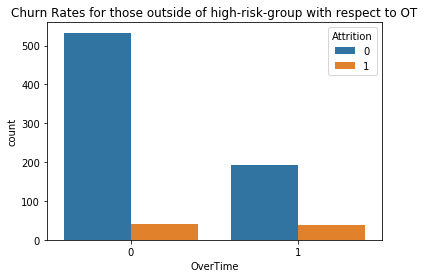

In [276]:
sns.countplot(others['OverTime'],hue=others['Attrition'])
plt.title('Churn Rates for those outside of high-risk-group with respect to OT')
plt.show()

In [274]:
sum(others[others['OverTime'] == 1]['Attrition'])/len(others[others['OverTime'] == 1]['Attrition'])

0.16883116883116883

In [275]:
sum(others[others['OverTime'] == 0]['Attrition'])/len(others[others['OverTime'] == 0]['Attrition'])

0.07142857142857142

In [279]:
others2 = OT_df[(OT_df['Age'] >= 30)&(OT_df['MaritalStatus'] != 2)&(OT_df['MonthlyIncome'] > 2500)]

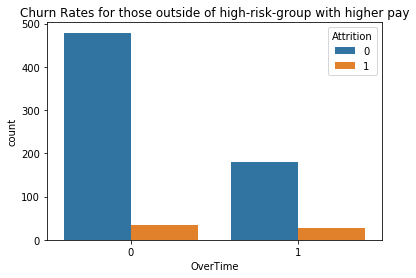

In [283]:
sns.countplot(others2['OverTime'],hue=others2['Attrition'])
plt.title('Churn Rates for those outside of high-risk-group with higher pay')
plt.show()

In [303]:
sum(others2[others2['OverTime'] == 1]['Attrition'])/len(others2[others2['OverTime'] == 1]['Attrition'])

0.1346153846153846

In [304]:
sum(others2[others2['OverTime'] == 0]['Attrition'])/len(others2[others2['OverTime'] == 0]['Attrition'])

0.06627680311890838

# Proportion Z-Test

In [295]:
from statsmodels.stats.proportion import proportions_ztest

In [299]:
>>> count = np.array([642, 591])
>>> nobs = np.array([1000, 1000])
>>> stat, pval = proportions_ztest(count, nobs)
>>> print(stat,pval)

2.3453407727949207 0.01900969625410689


In [305]:
print(sum(OT_df[OT_df['OverTime'] == 1]['Attrition']))
print(len(OT_df[OT_df['OverTime'] == 1]['Attrition']))

127
416


In [306]:
print(sum(OT_df[OT_df['OverTime'] == 0]['Attrition']))
print(len(OT_df[OT_df['OverTime'] == 0]['Attrition']))

110
1054


In [308]:
>>> count = np.array([127, 110])
>>> nobs = np.array([416, 1054])
>>> stat, pval = proportions_ztest(count, nobs)
>>> print(stat,pval)

9.436306407944759 3.8615179104328466e-21


In [311]:
sum(OT_df[OT_df['OverTime'] == 1]['Attrition'])/len(OT_df[OT_df['OverTime'] == 1]['Attrition'])

0.30528846153846156

In [312]:
sum(OT_df[OT_df['OverTime'] == 0]['Attrition'])/len(OT_df[OT_df['OverTime'] == 0]['Attrition'])

0.10436432637571158